In [348]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [349]:
data =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test["PassengerId"]

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [351]:
data.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Addressing Missing Values

#### 1. Age missing values

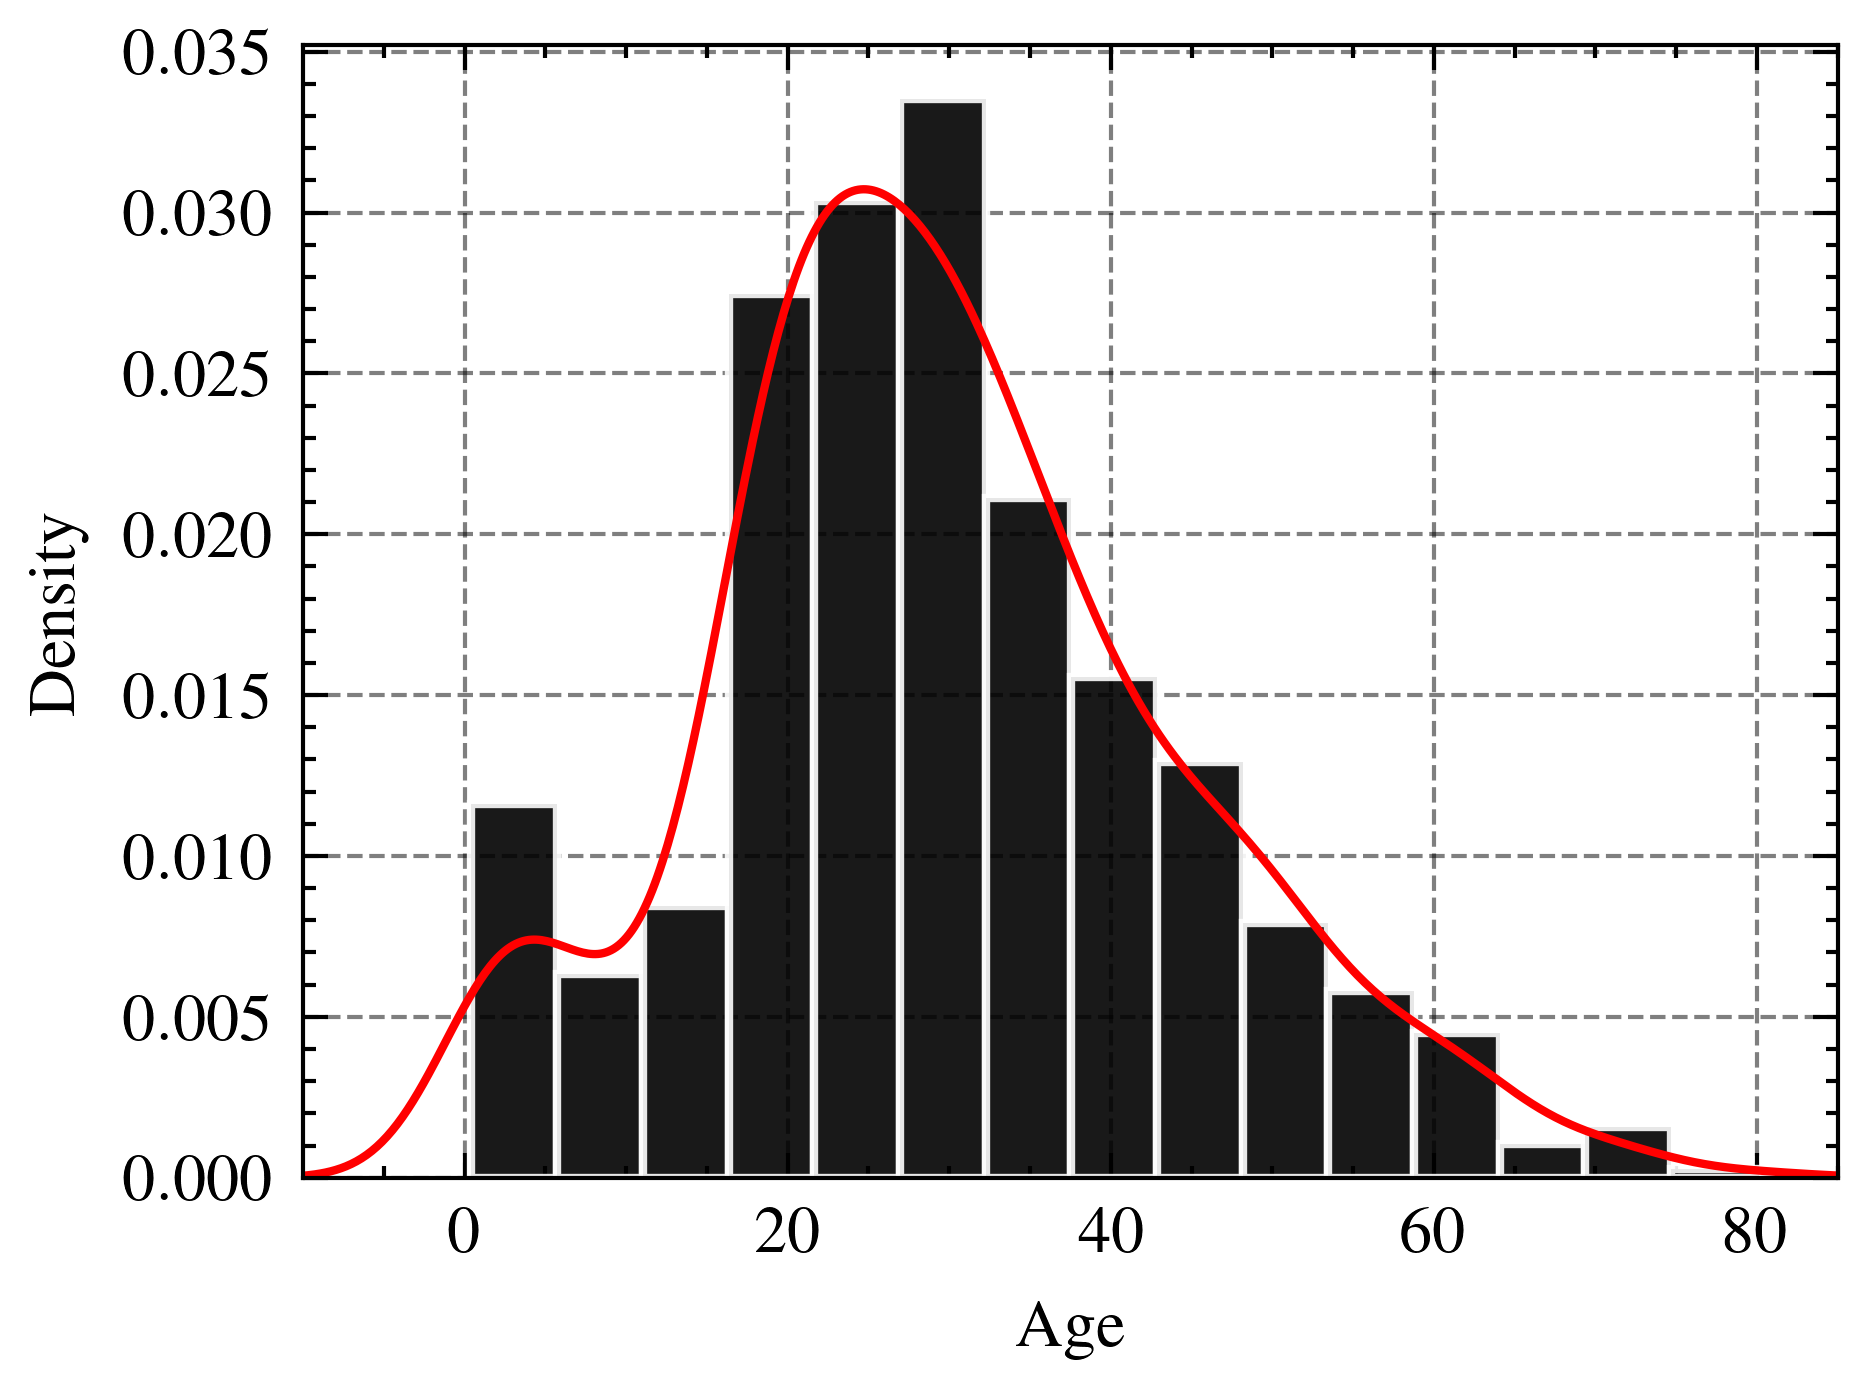

In [352]:
plt.style.use(['science','ieee','grid'])
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='black',edgecolor='white', alpha=0.9)
data["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
# plt.savefig('Agemissingvalues')
plt.show()

Since Age is (right) skewed, imputing the missing values with mean(29.69) may gives a biased result by filling the ages that are older than observed. We'll use median(28.0) to impute the missing values instead. 

#### 2. Cabin Missing Values

In [353]:
print("Percentage of Cabin Missing Values: ", 100*sum(data['Cabin'].isnull())/(len(data)), "%")

Percentage of Cabin Missing Values:  77.10437710437711 %


This feature could be dropped due to large missing values or the missing values itself could be considered as a feature and used during feature engineering. Cabin being indicative of closeness to deck and fare, it is not wise to drop this column as such. We'll investigate this in the feature engineering section

#### 3. Embarked

In [1]:
sns.countplot(x='Embarked',data = data,palette = 'plasma')
plt.savefig('EmbarkedCount Plot')
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-6e6b06bf8d1a>, line 4)

Embarked has only 2 missing values. We can just impute the missing values with most frequent place people boarded (Southampton)

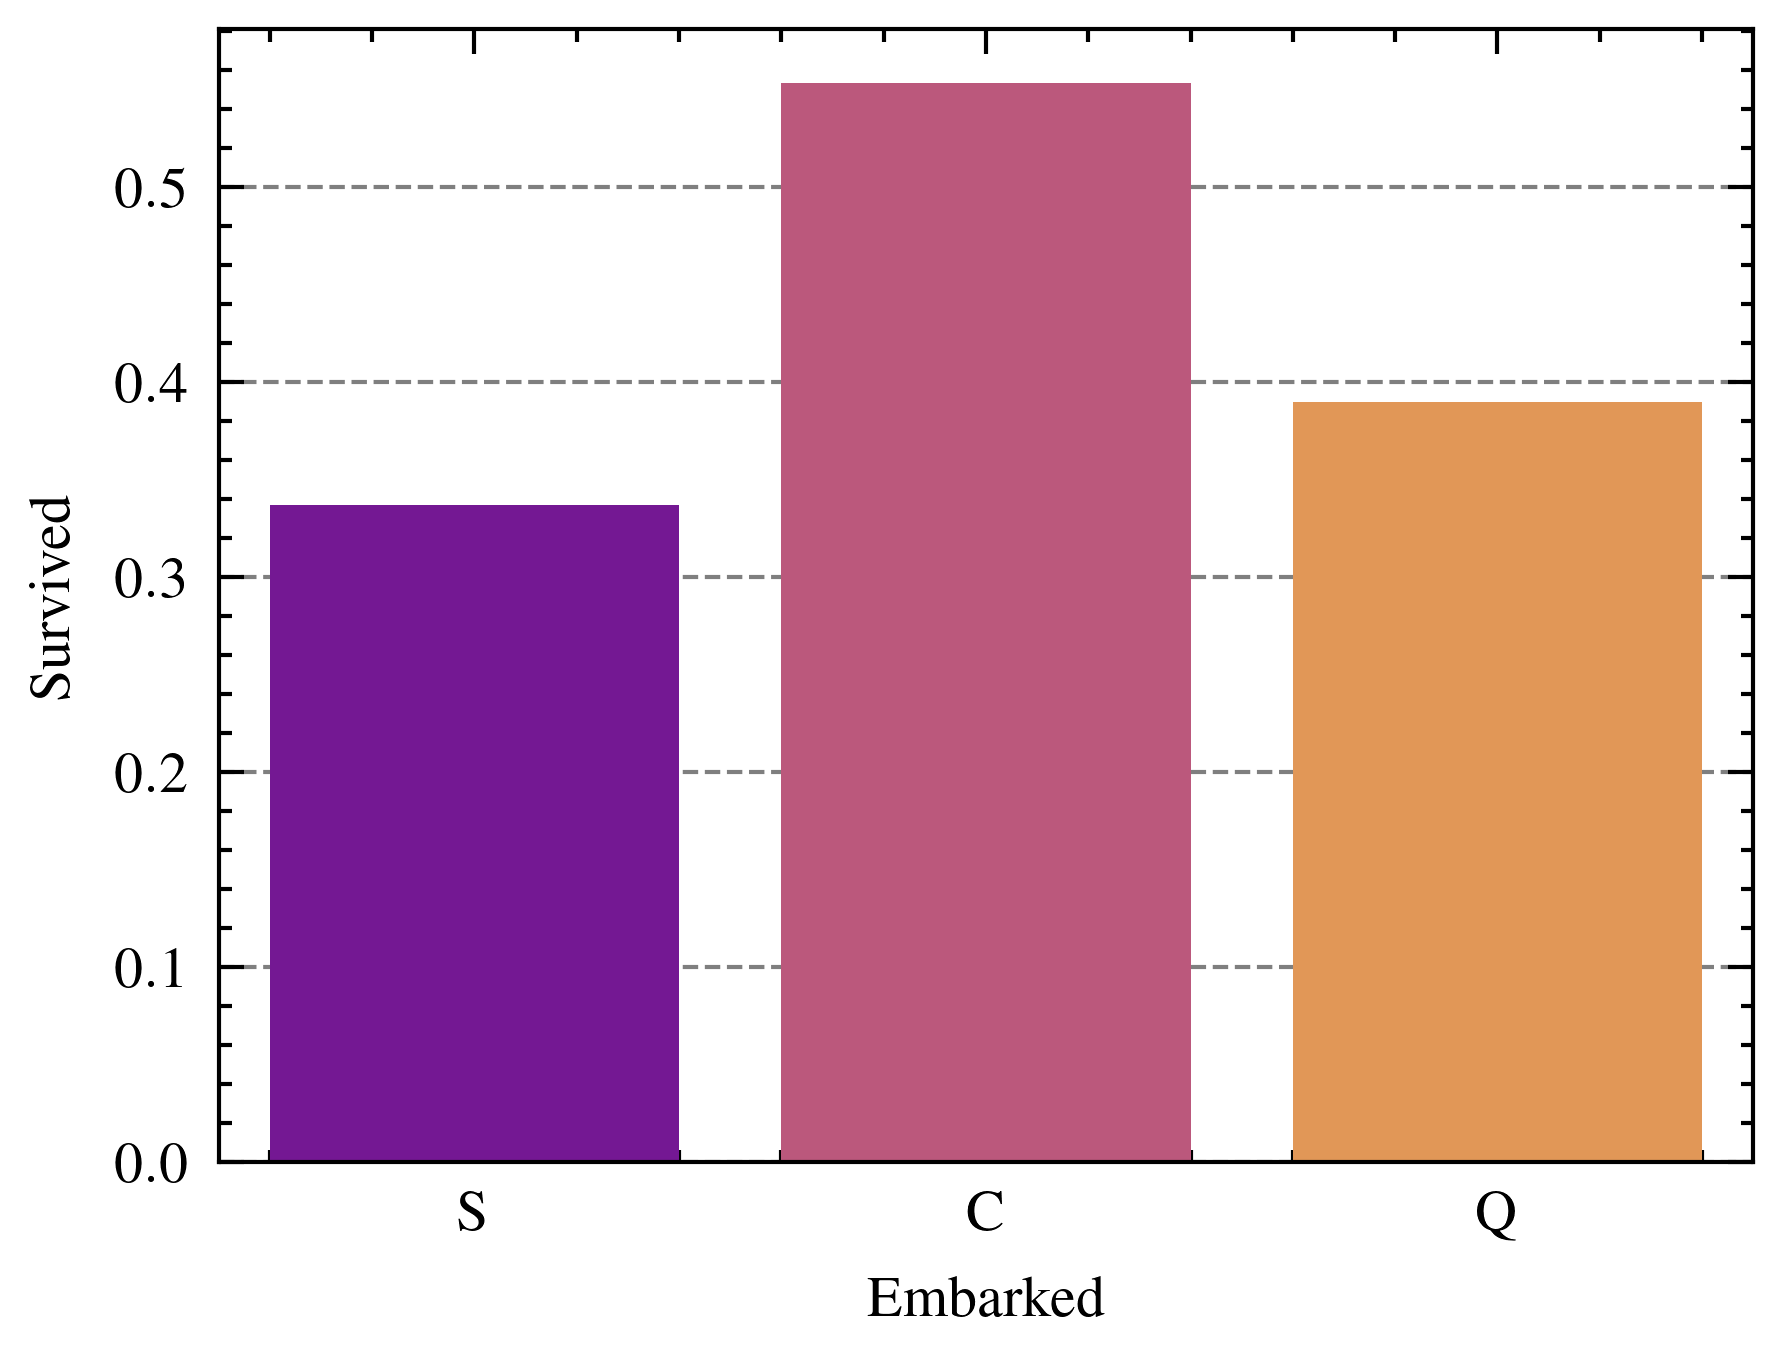

In [26]:
sns.barplot(x='Embarked',y='Survived',data = data,palette = 'plasma',ci=None)
plt.savefig('EmbarkedvsSurvived')
plt.show()

#### 4. Fare

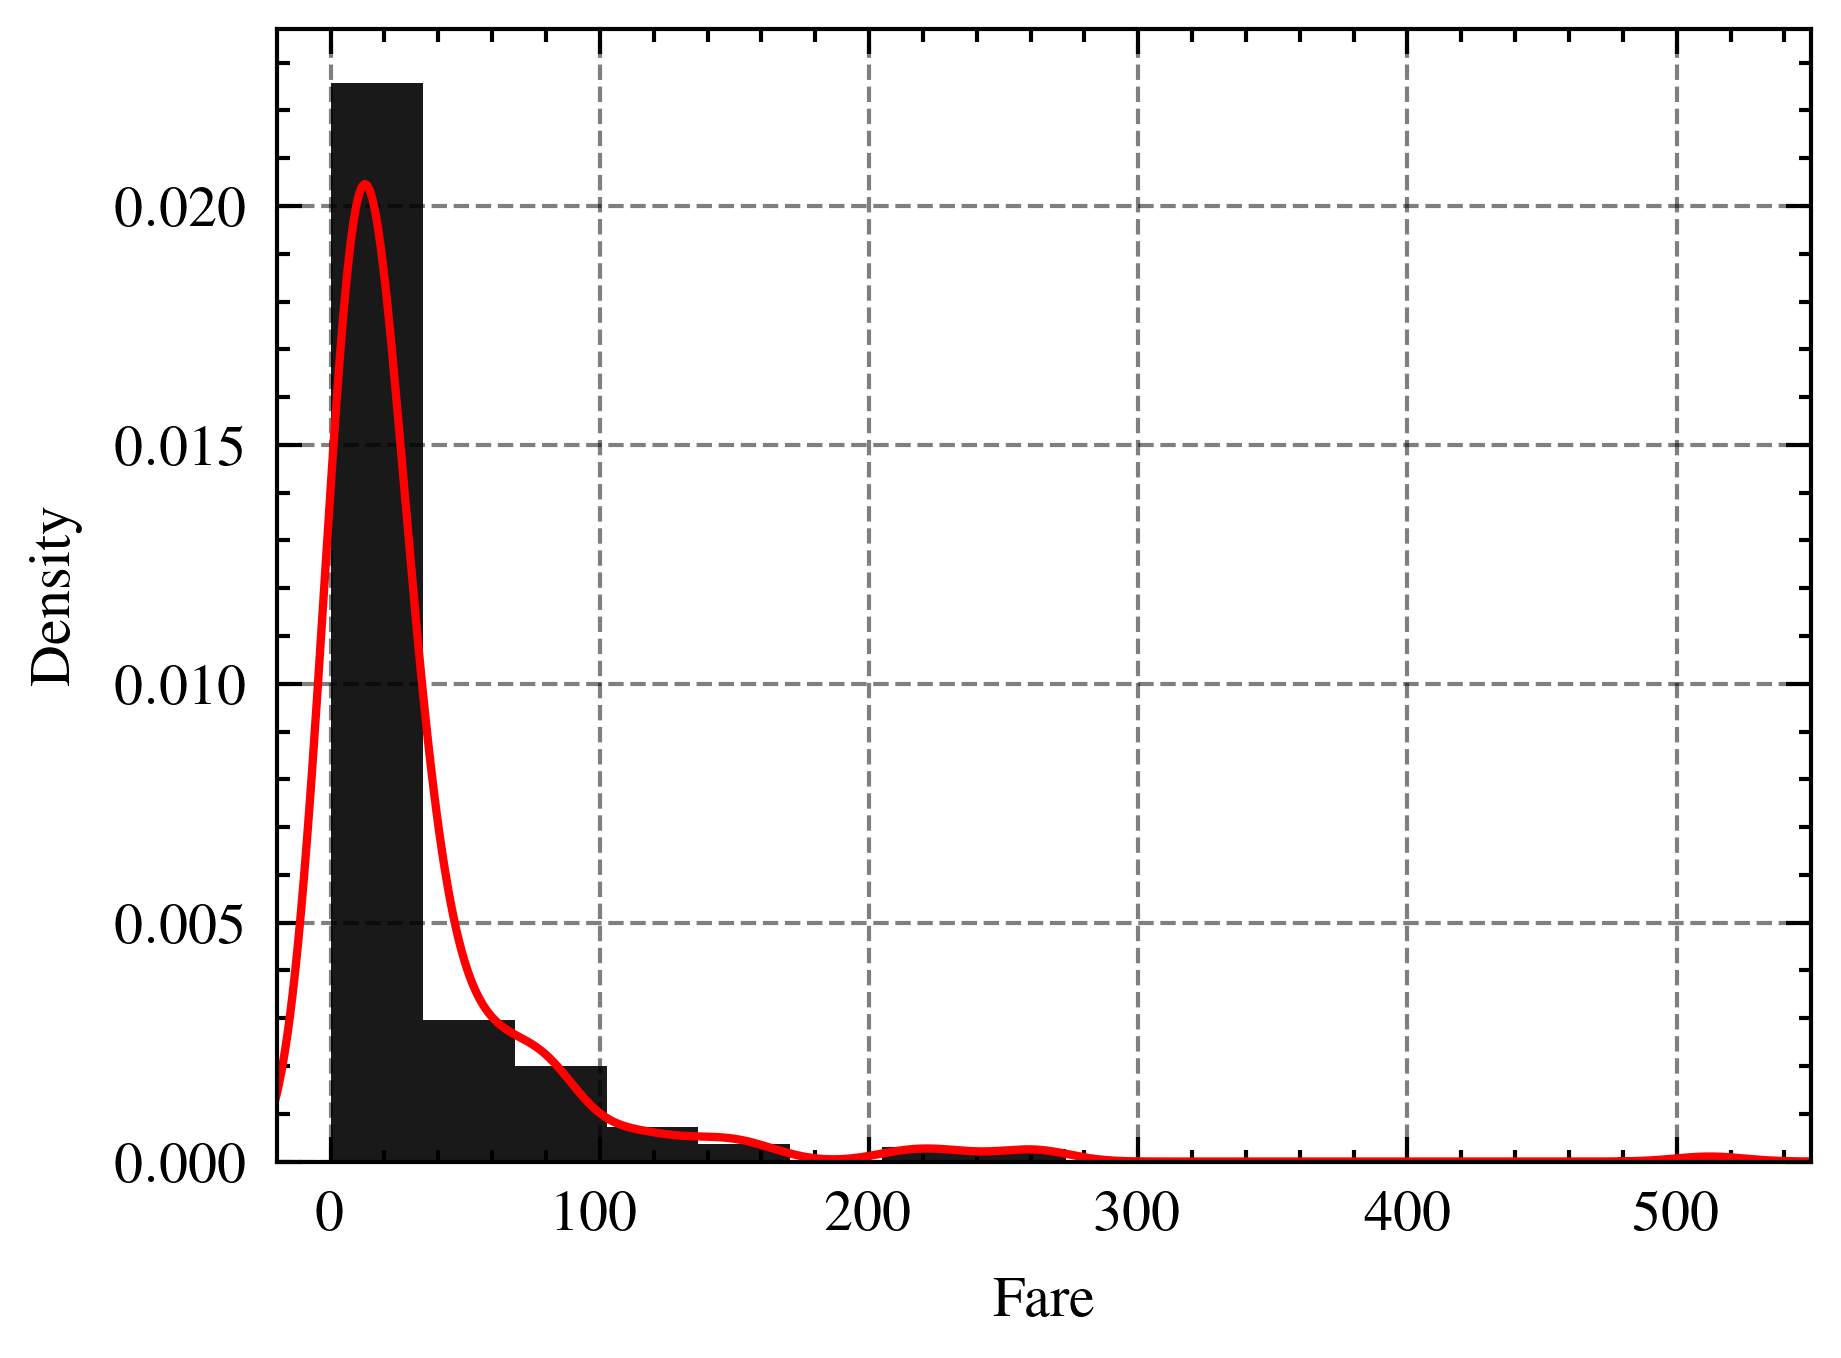

In [53]:
ax = data["Fare"].hist(bins=15, density=True, stacked=True, color='black',edgecolor = 'white', alpha=0.9)
data["Fare"].plot(kind='density', color='red')
ax.set(xlabel='Fare')
plt.xlim(-20,550)
plt.savefig('Faremissingvalues')
plt.show()

Since Fare is skewed, we will use median to impute missing values (if any)

### better imputation (changes)
-let's use regression based imputer strategy for missing values instead

## Exploratory Data Analysis

### Imbalancedness

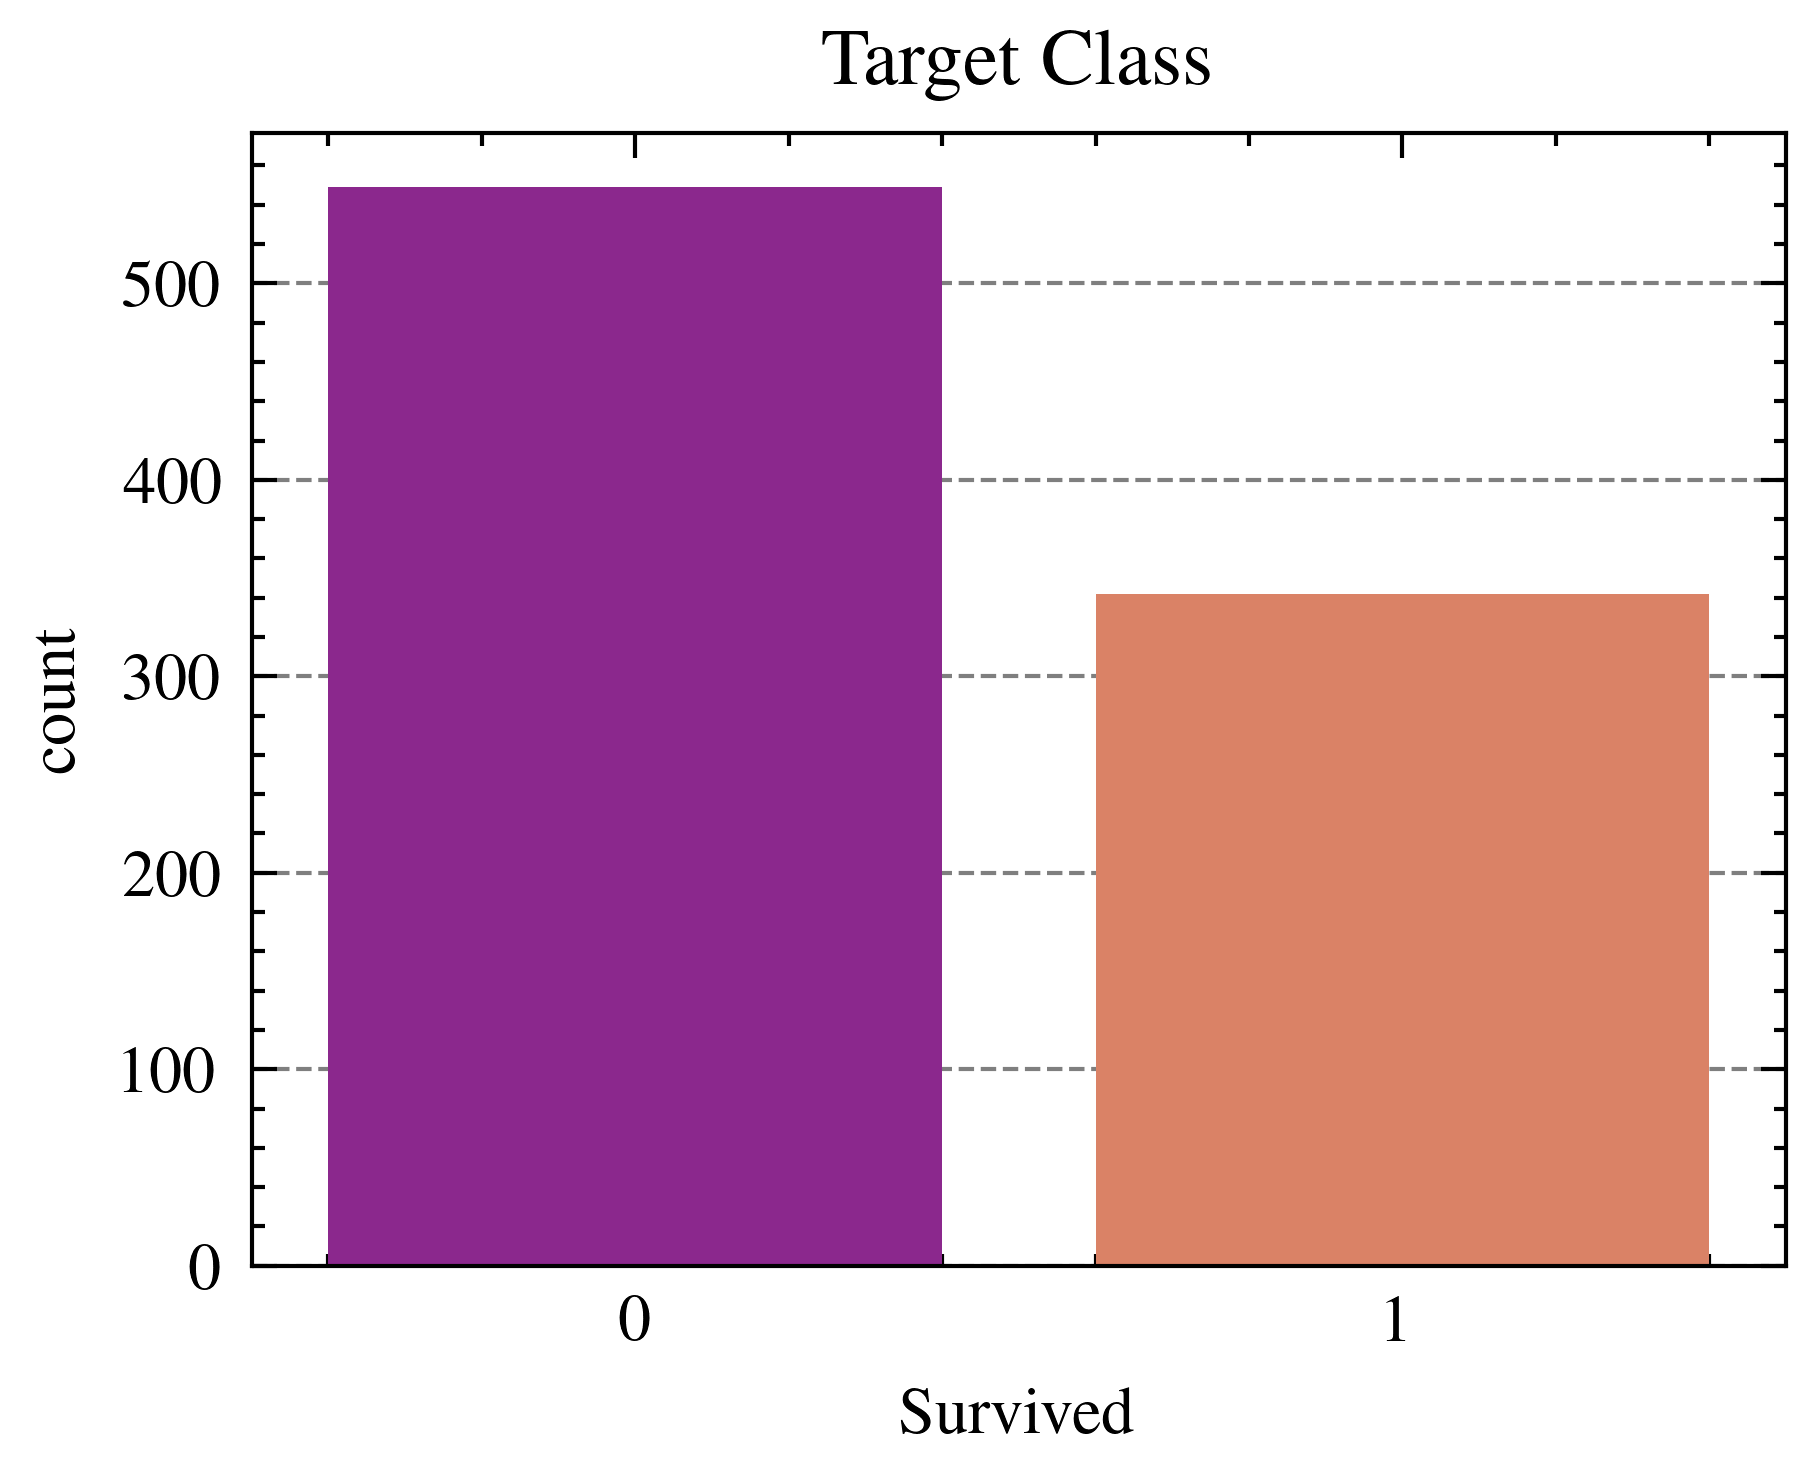

In [15]:
sns.countplot(x='Survived',data = data, palette = 'plasma')
plt.title('Target Class')
plt.savefig('Passengerclassplot')
plt.show()

There is a slight imbalancedness. There are more passengers who have not survived and less who have survived. We'll grid search this though

In [354]:
print('Not Survived: ',sum(data['Survived']==0)/len(data)*100,'%')
print('Survived: ',sum(data['Survived']==1)/len(data)*100,'%')

Not Survived:  61.61616161616161 %
Survived:  38.38383838383838 %


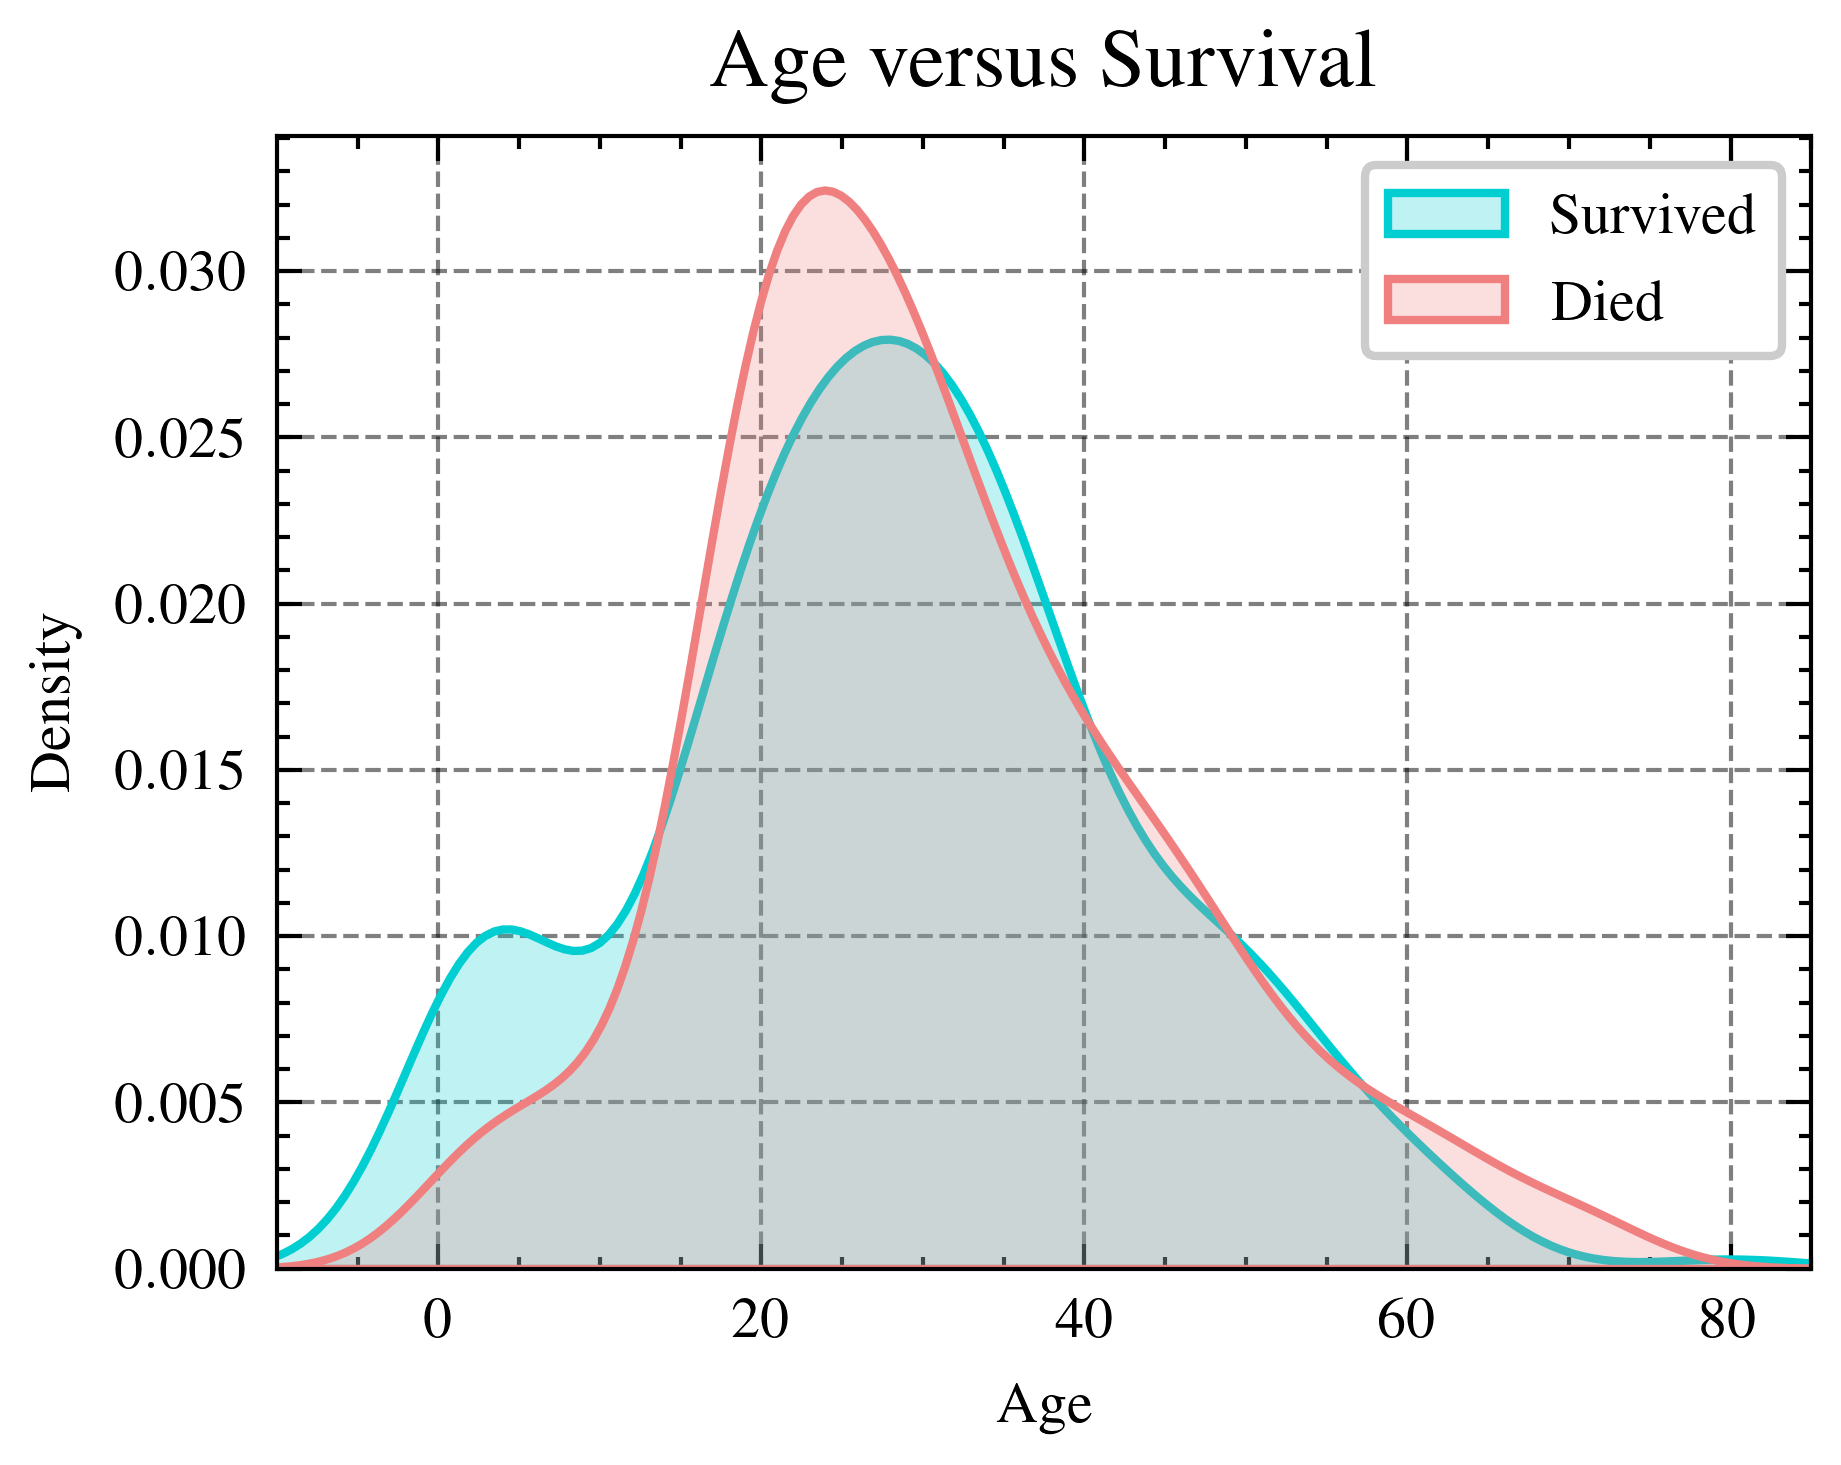

In [54]:
plt.figure()
ax = sns.kdeplot(data["Age"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Age"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Age versus Survival',fontsize = 10)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.savefig('Agevssurvival')
plt.show()

The distribution of the survived and dead are similar. One particular difference is that, a large proportion of children survived. This makes sense as children were given importance during evacuation in life rafts in the movie and would have been the same in real life.

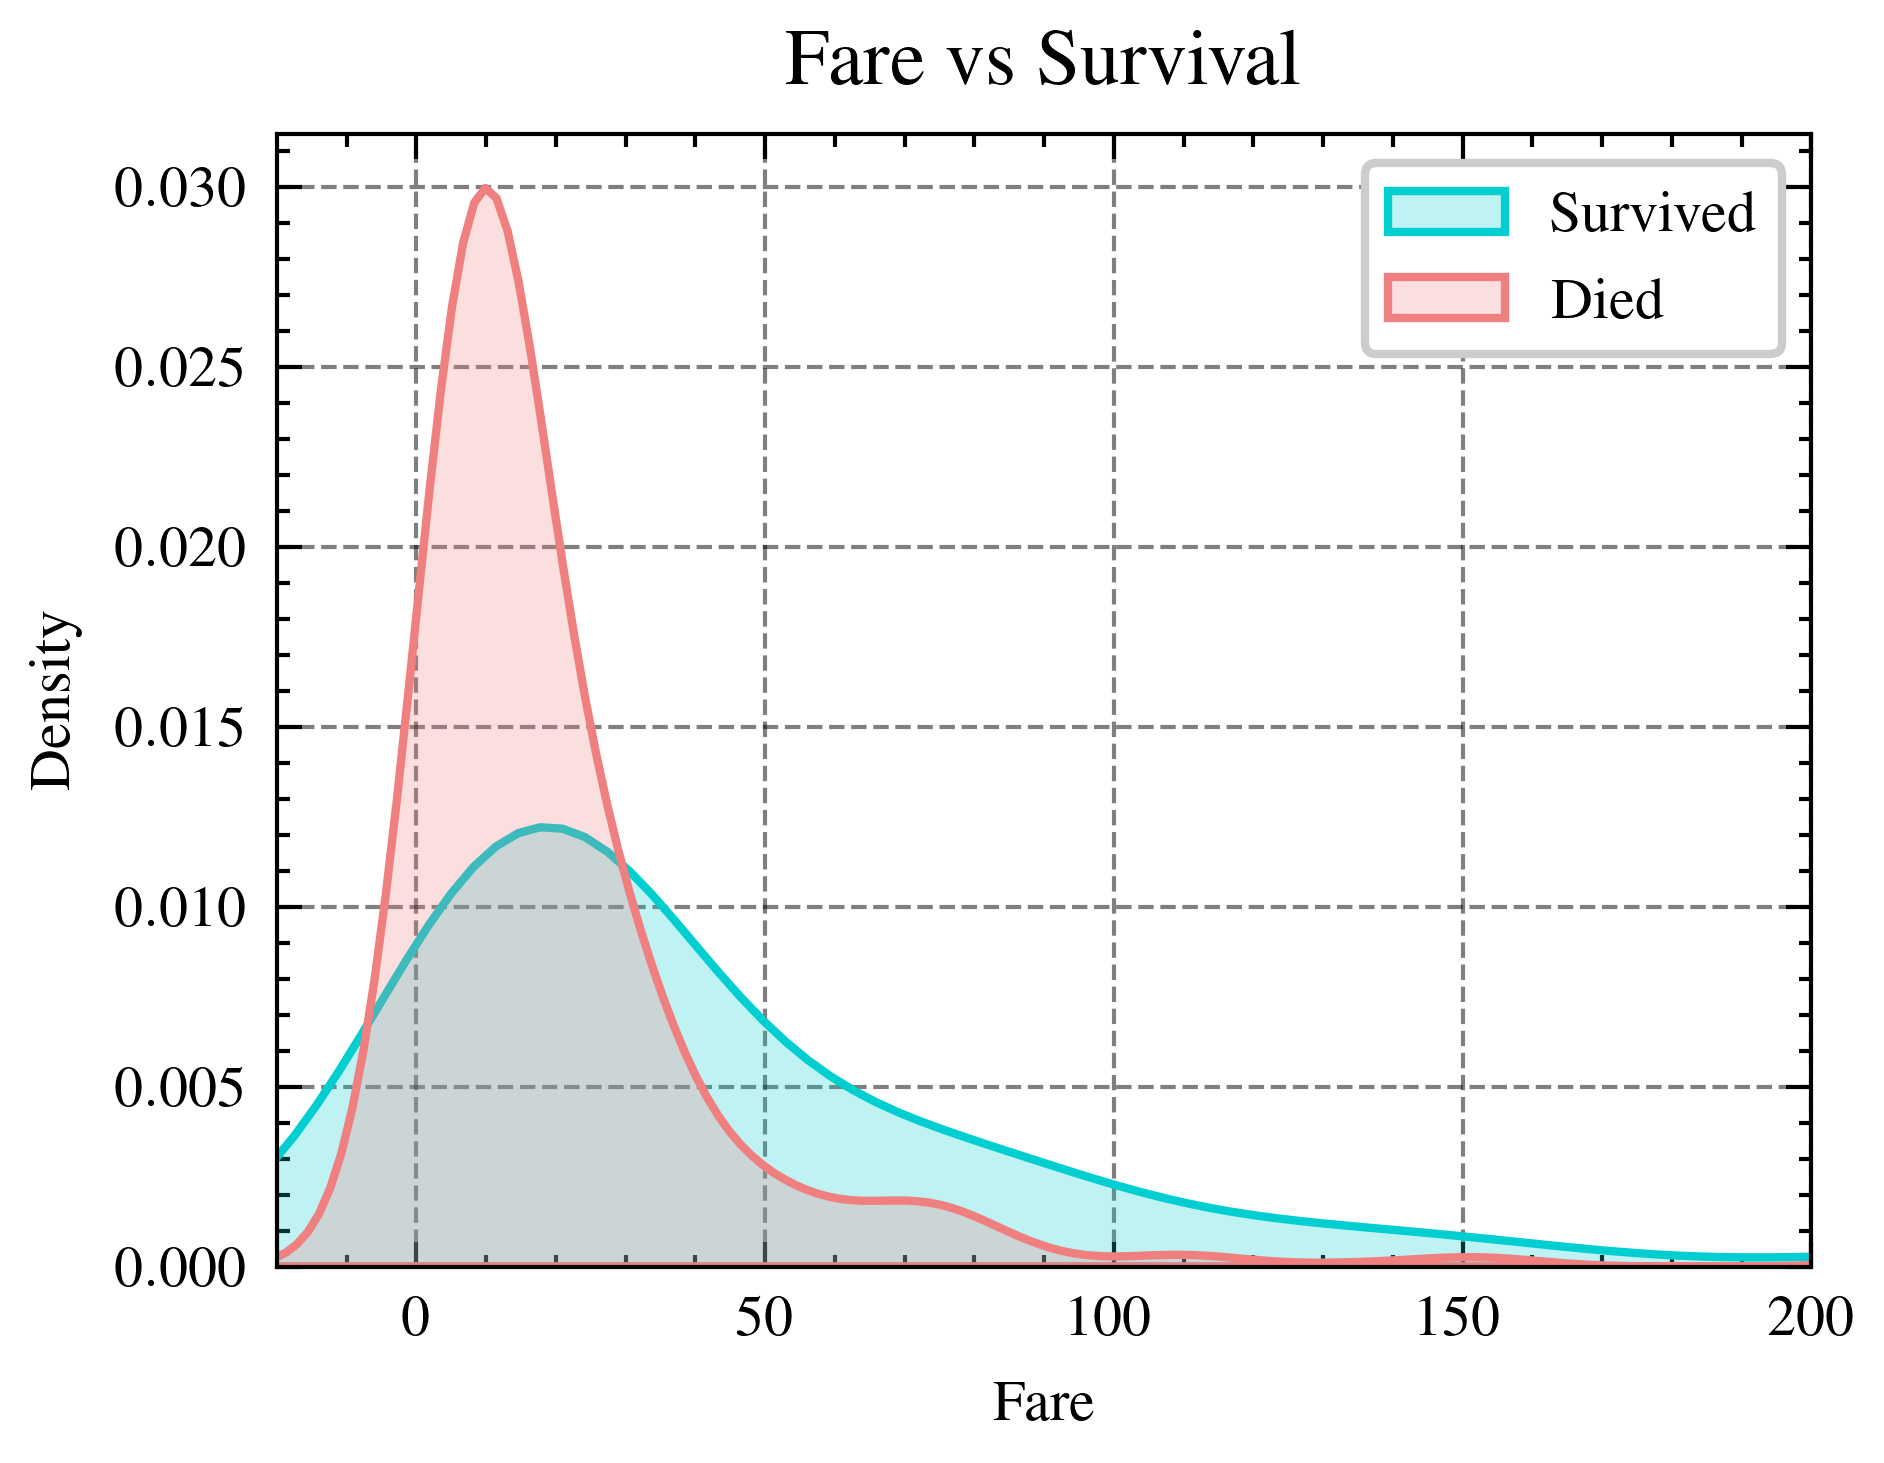

In [56]:
plt.figure()
ax = sns.kdeplot(data["Fare"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Fare vs Survival')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.savefig('Farevssurvival')
plt.show()

Passengers who were able to afford and pay more survived more and those who paid lower fare less likely survived sadly. This could also be related to the location of rooms offered and the ease of access to life boats during the tragedy.

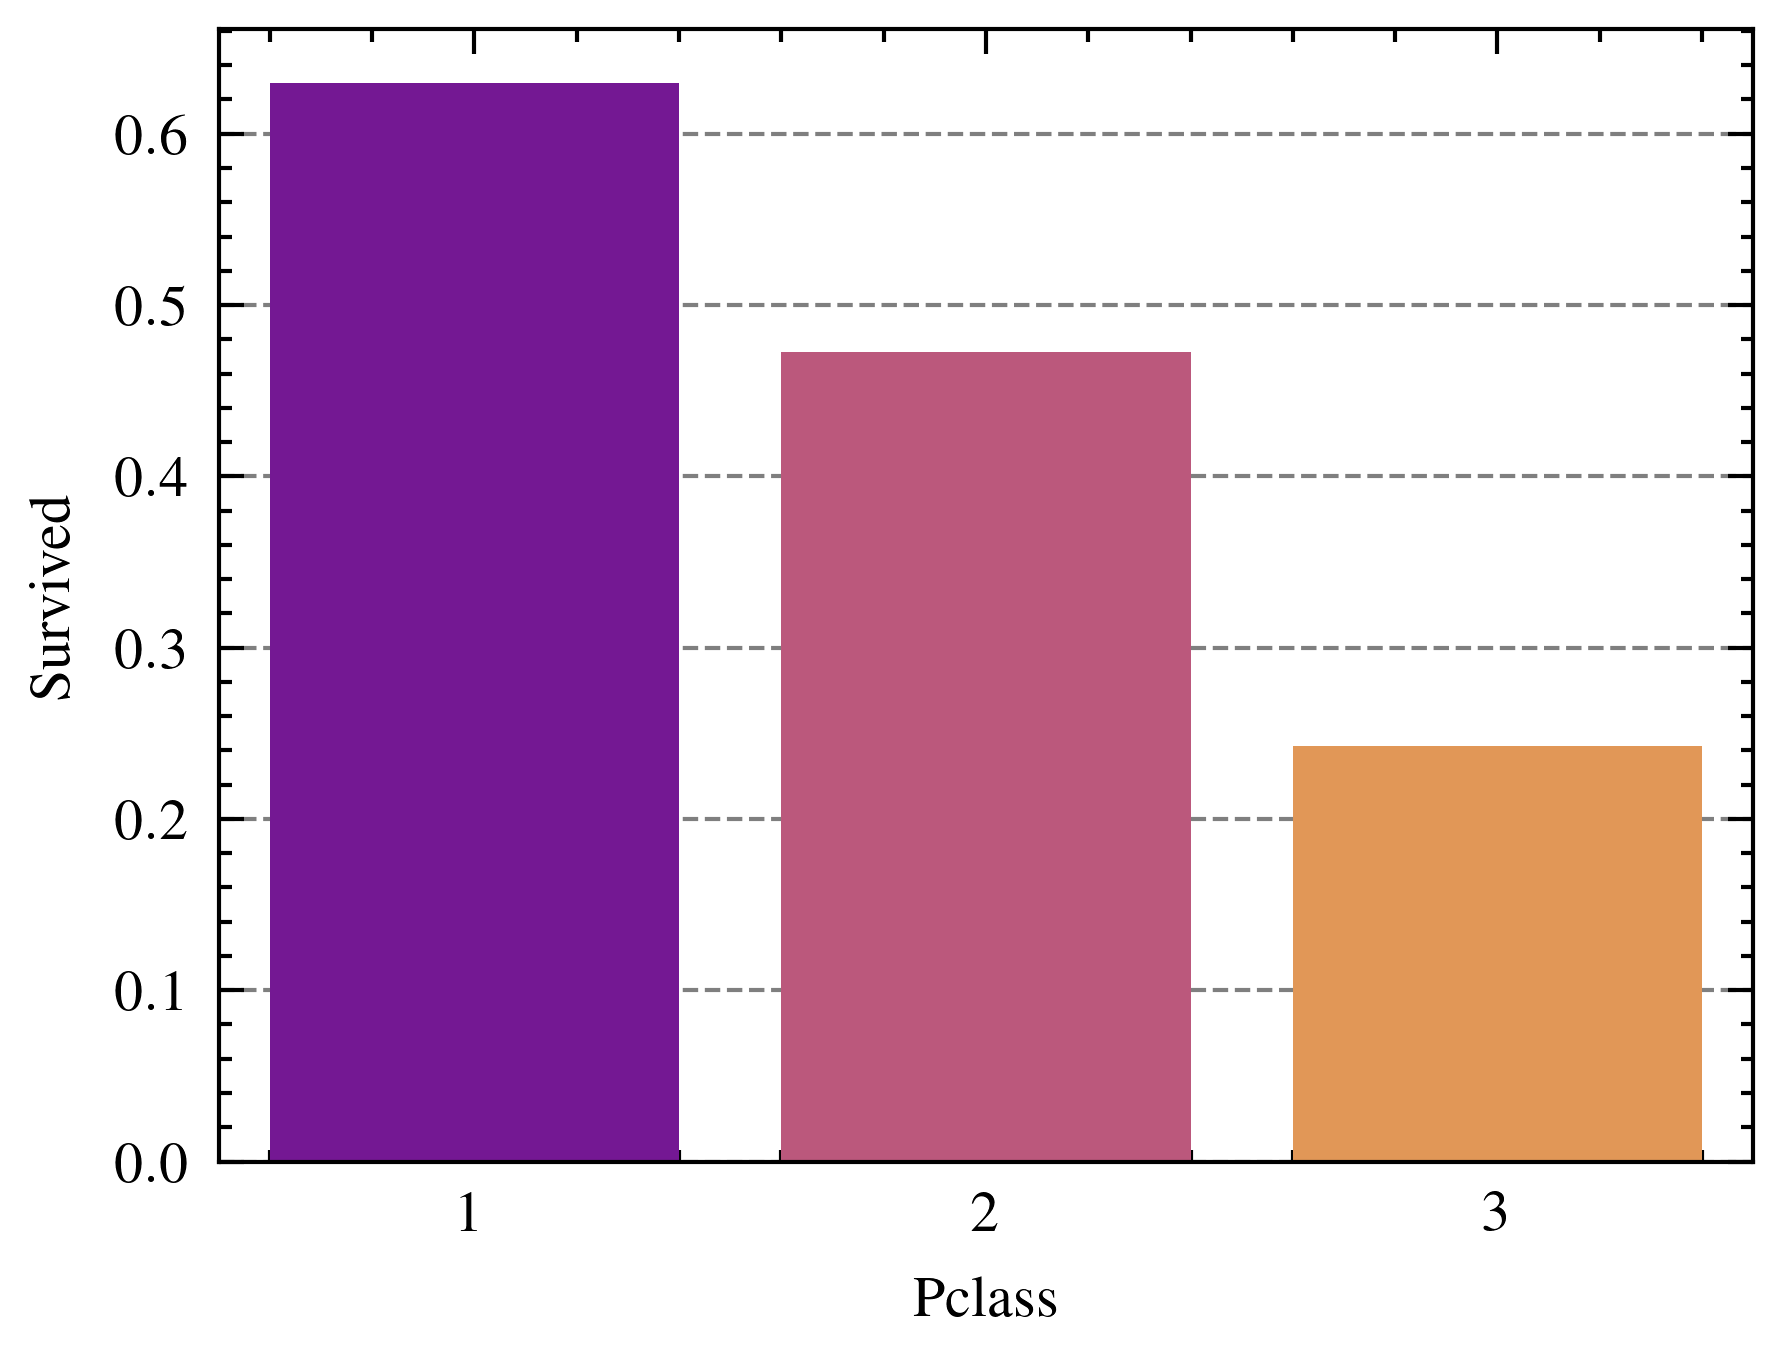

In [58]:
sns.barplot(x='Pclass',y='Survived',data = data, palette = 'plasma',ci=None)
plt.savefig('Passengerclassplot')
plt.show()

First class passenger was the safest and third class was the unsafest travelling option.

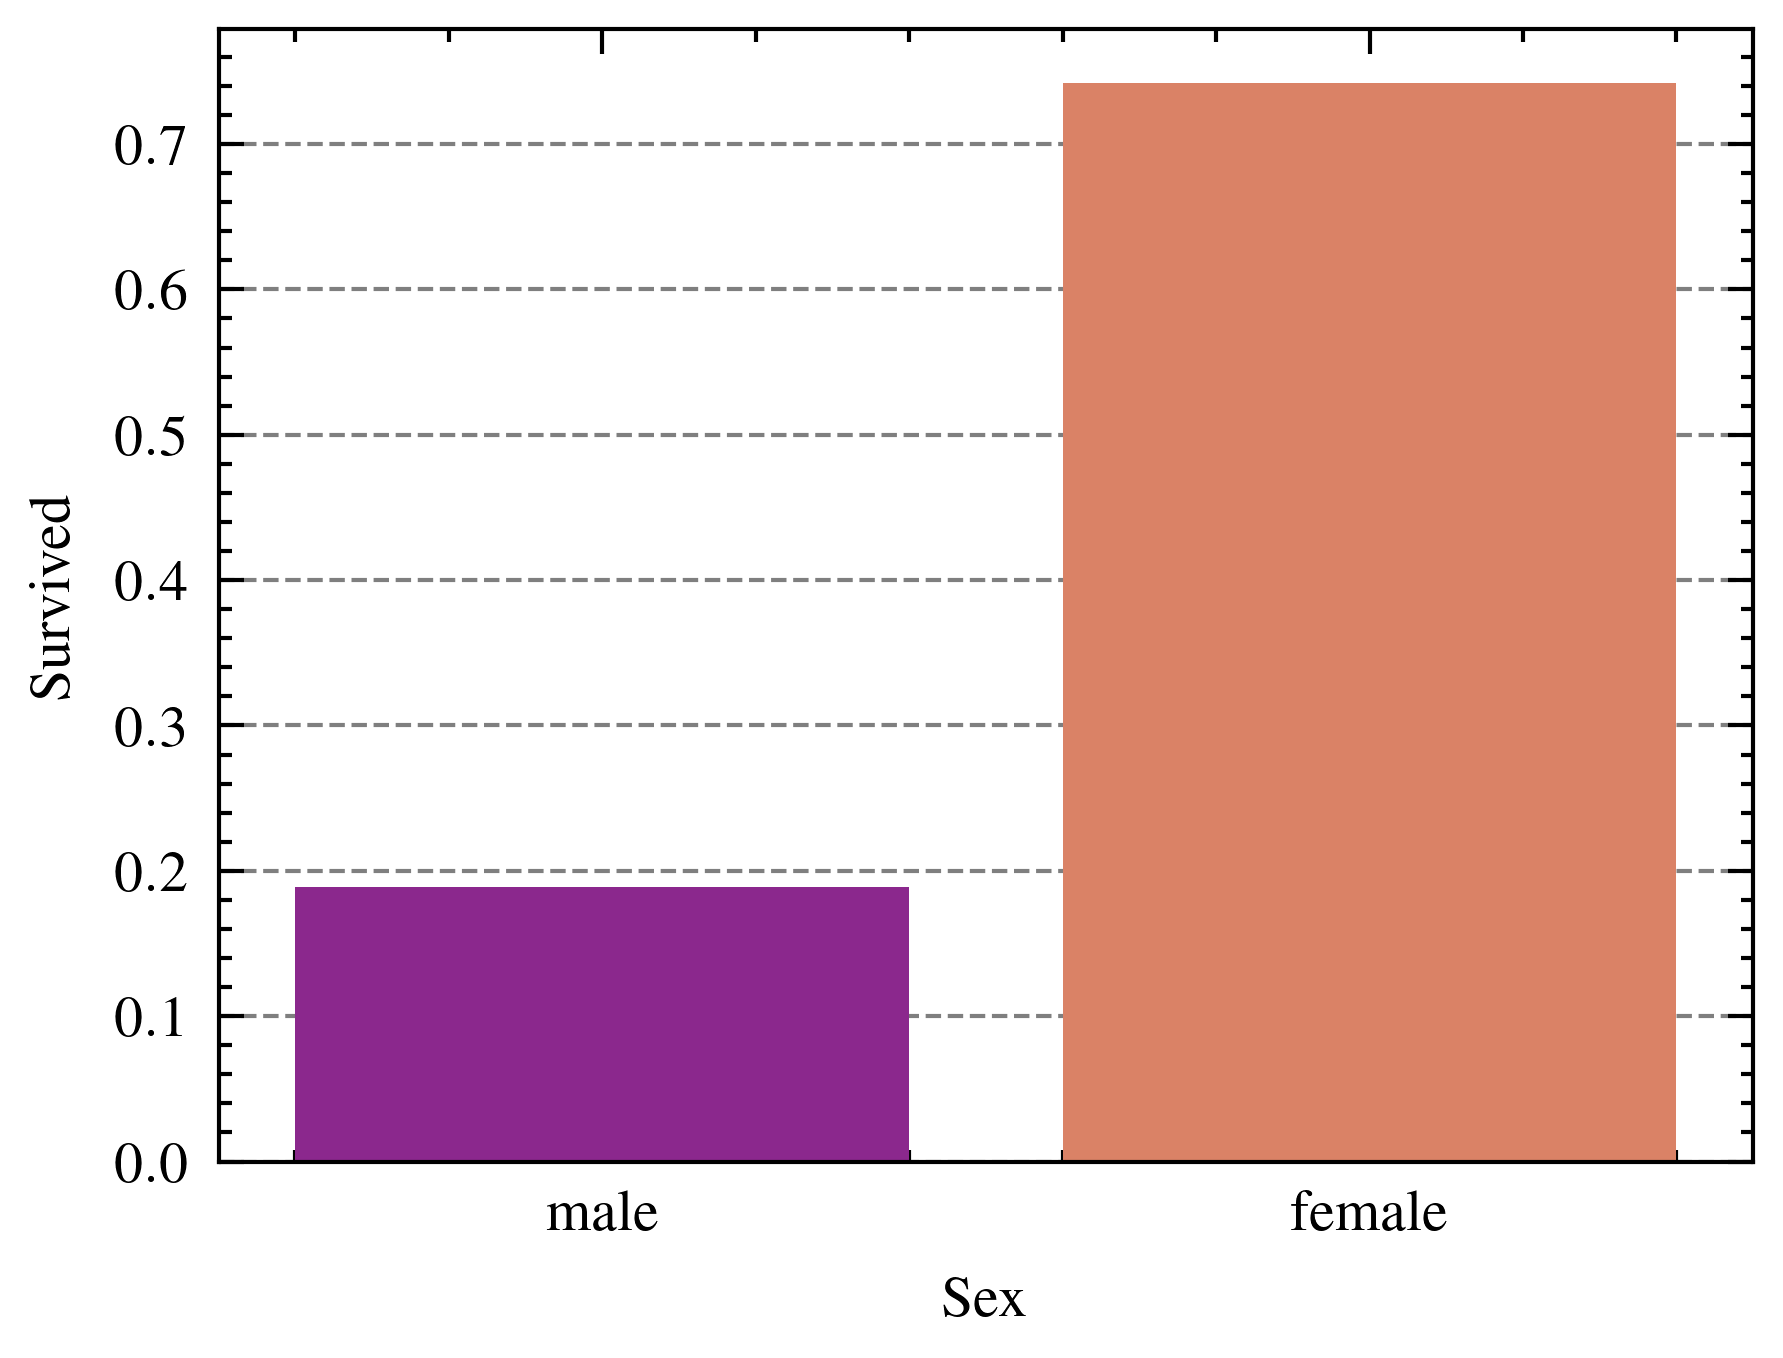

In [59]:
sns.barplot(x='Sex',y='Survived',data = data,palette = 'plasma',ci=None)
plt.savefig('Genderplot')
plt.show()

Females clearly had more survival. This could be because more importance would have been given to them during evacuation and women with children could have been the first to be evacuated (according to the movie)

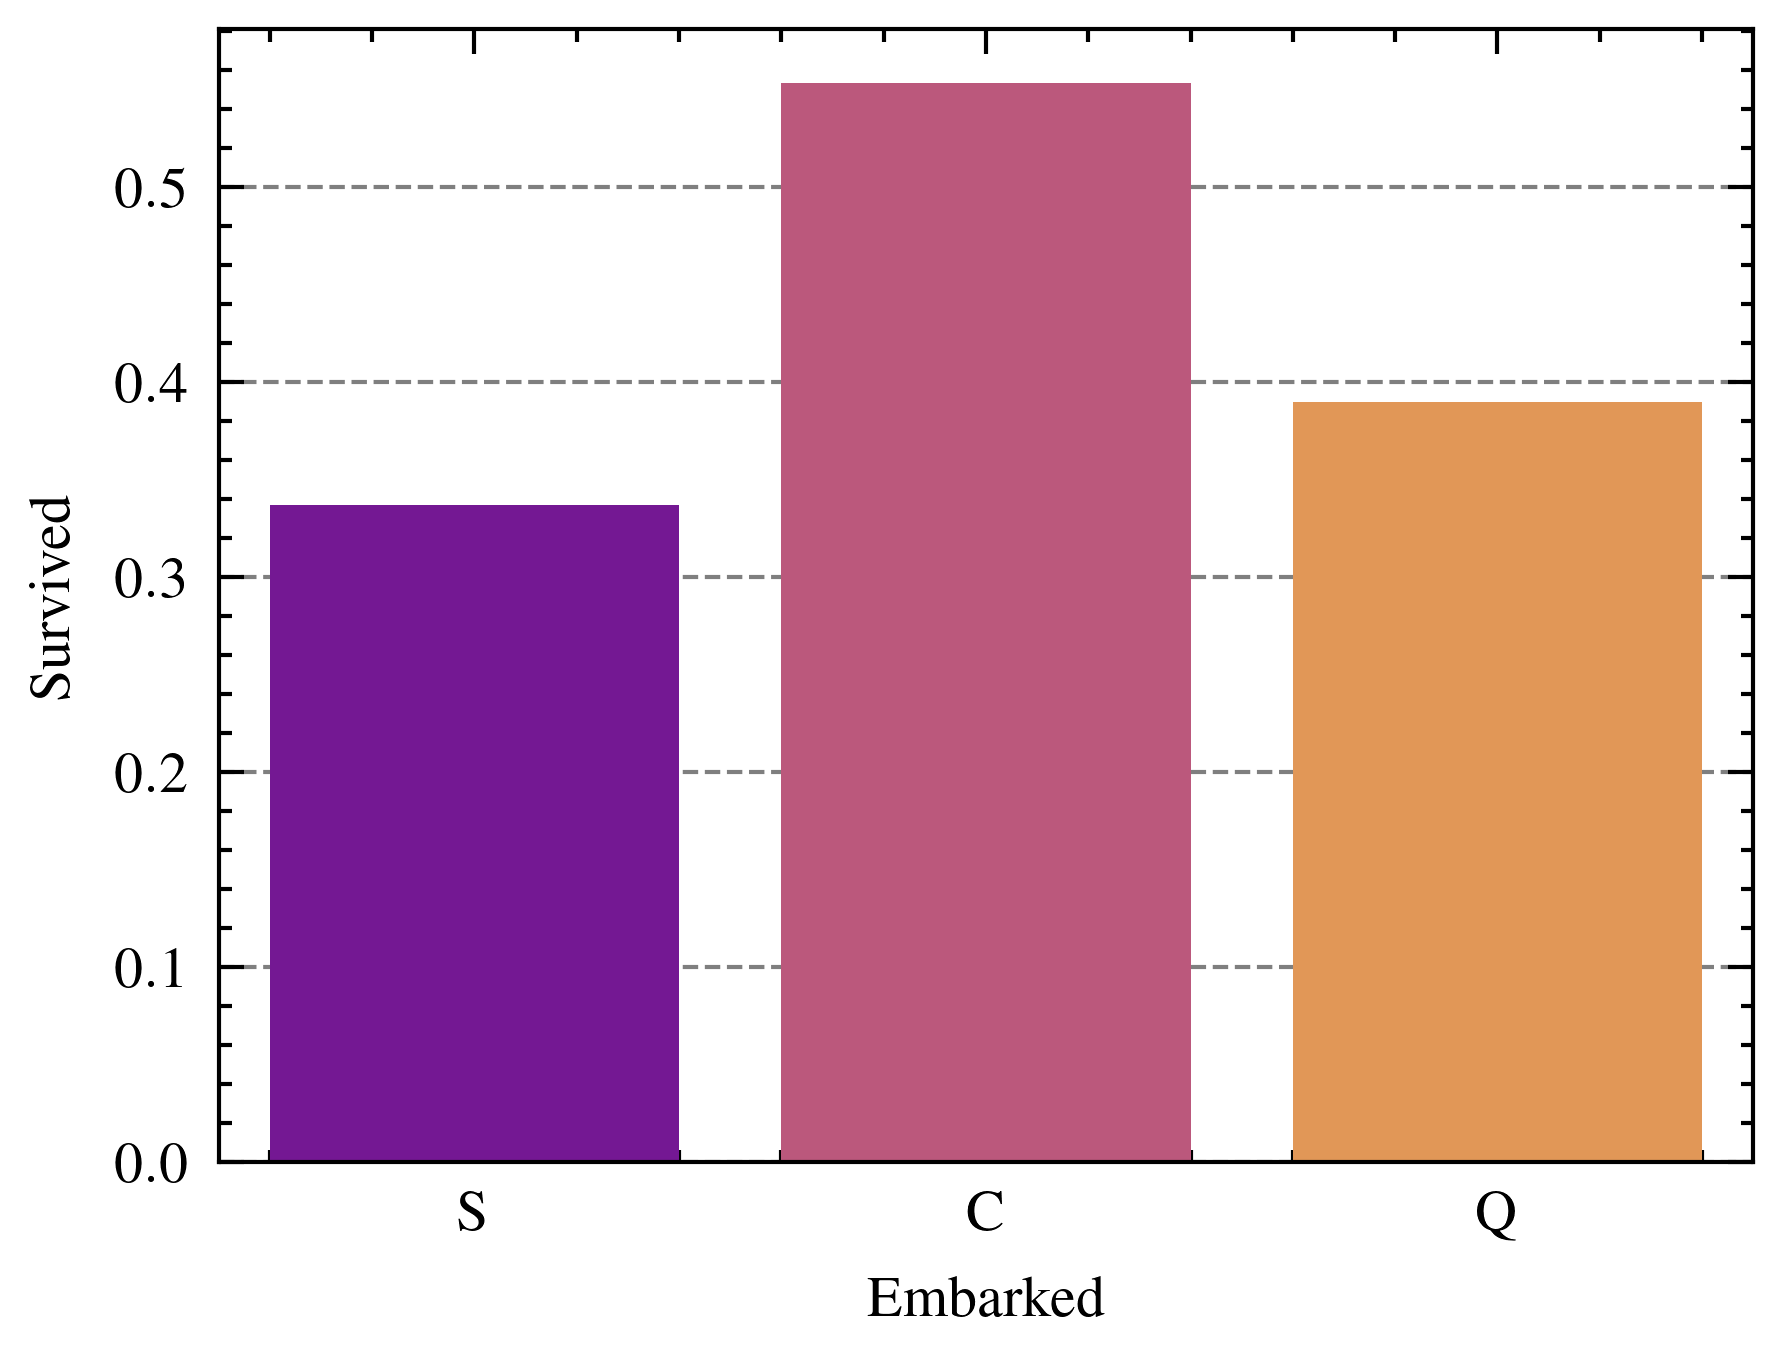

In [60]:
sns.barplot(x='Embarked',y='Survived',data = data,palette = 'plasma',ci=None)
plt.savefig('Embarkedplot')
plt.show()

People boarded from Cherbourg, France have had the highest survival rate and those who boarded from Southampton less likely survived. While this as such doesn't make sense intuitively, the average fare spent by a Cherbourg passenger was 59.95$ dollars, highest among all the three locations. This could mean that people boarded from Cherbourg, on an average, were significantly richer too and hence had a better chance of survival.

In [61]:
# Proof for Cherbourg mean fare
pd.pivot_table(index = 'Embarked',data = data,values = ['Fare','Survived'],aggfunc = {'Fare':np.mean,'Survived':np.mean})

,Fare,Survived
Embarked,,
C,59.954144,0.553571
Q,13.276030,0.389610
S,27.079812,0.336957


# Feature Engineering
**and preparing the dataset**

The following were explored: 
- Titles were extracted from Name column. This is an extremely useful feature. This could reflect gender, roles, net-worth, respect at those periods of time

In [355]:
num_col = ['Age','SibSp','Parch','Fare']
cat_col = ['Pclass','Sex','Embarked']

In [422]:
def TitleExtractor(df):
    title = []
    for name in df['Name']:
        namesplit = name.split(',')
        title_withspace = namesplit[1].split('.')[0]
        title.append(title_withspace.strip())
    df['title'] = title 
    return df  
    
def CabinGroup(df):
    df['Cabin'].fillna(value = 'U',inplace = True)
    df['Cabin_grp'] = df['Cabin'].apply(lambda x: x[0])
    return df  


def TicketExtractor(df):
    Ticket_first = [] 
    Ticket_last = []
    for record in df['Ticket']:
        if record.isnumeric():
            Ticket_first.append('U')
            Ticket_last.append(int(record)) 
        elif record=='LINE':
            Ticket_first.append('LINE')
            Ticket_last.append(-1)
        else:
            temp = record.split(' ')
            Ticket_first.append(temp[0])
            Ticket_last.append(int(temp[-1]))
            
    df['Ticket_first'] = Ticket_first 
    df['Ticket_last'] = Ticket_last 
    return df


class TicketShared:
    def __init__(self):
        self.d = {} 
    def fit(self,df):
        for num in df['Ticket_last']:
            if num not in self.d:
                self.d[num] = 1 
            else: 
                self.d[num] +=1 
    def transform(self,df):
        li = [] 
        for num in df['Ticket_last']:
            if num in self.d:
                li.append(self.d[num])
            else:
                li.append(1)
        df['Ticket_shared'] = li
        return df
        
class MissingValues: 
    def __init__(self):
#         self.Age = None 
        self.Embarked = None 
#         self.Fare = None
    def fit(self,df):
#         self.Age = df['Age'].mean() 
        self.Embarked = df['Embarked'].mode() 
#         self.Fare = df['Fare'].mean() 
    def transform(self,df):
#         df['Age'].fillna(self.Age,inplace = True)
        df['Embarked'].fillna(self.Embarked[0],inplace = True)
#         df['Fare'].fillna(self.Fare,inplace = True)
        return df 

def selectcols(df):
    cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Cabin_grp','Ticket_shared','title'] 
    return df[cols]
    
class OneHot:
    def __init__(self):
        self.columns = ['Sex','Embarked','Cabin_grp','Ticket_shared','title']
        self.encoders = []
    def fit(self,df):
        from sklearn.preprocessing import LabelBinarizer 
        for col in self.columns:
            encoder = LabelBinarizer()
            encoder.fit(df[col])
            self.encoders.append(encoder) 
        
    def transform(self,df):
        for i in range(len(self.columns)):
            encoder = self.encoders[i]
            if i==0:
                df = df.join(pd.DataFrame(encoder.transform(df[self.columns[i]]),
                                          columns = encoder.classes_[:-1],index = df.index))
            else:
                df = df.join(pd.DataFrame(encoder.transform(df[self.columns[i]])[:,:-1],
                          columns=encoder.classes_[:-1], 
                          index=df.index),rsuffix = self.columns[i])
            df.drop(self.columns[i],axis=1,inplace = True)
        return df
    
    
class Label:
    def __init__(self):
        self.columns = ['Pclass']
        self.encoders = []
    def fit(self,df):
        from sklearn.preprocessing import LabelEncoder 
        for col in self.columns:
            encoder = LabelEncoder()
            encoder.fit(df[col])
            self.encoders.append(encoder) 
        
    def transform(self,df):
        encoder = self.encoders[0]
        new_ = pd.DataFrame(encoder.transform(df[self.columns[0]]), 
                    index=df.index)
        new_.columns = ['label_pclass'] 
        df = df.join(new_)
        df.drop(self.columns[0],axis=1,inplace = True)
        return df

In [423]:
train = TitleExtractor(data)
train = CabinGroup(train)
train = TicketExtractor(train)
obj = MissingValues() 
obj.fit(train)
train = obj.transform(train)



obj2 = TicketShared()
obj2.fit(train)
train = obj2.transform(train)
train = selectcols(train)
obj3 = OneHot()
obj3.fit(train)
train = obj3.transform(train)
obj4 = Label()
obj4.fit(train)
train = obj4.transform(train)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=42)

imp.fit(train)
train[train.columns] = imp.transform(train)



In [497]:
import numpy as np
from sklearn.metrics.pairwise import check_pairwise_arrays

def anova_kernel(X, Y=None, gamma=None, p=1):
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1. / (X.shape[1])

    diff = X[:, None, :] - Y[None, :, :]
    diff **= 2
    diff *= -gamma
    np.exp(diff, out=diff)
    K = diff.sum(axis=2)
    K **= p
    return K

In [524]:
1/38

0.02631578947368421

In [560]:
K_train = anova_kernel(train,gamma=1)
clf = Pipeline([
    ('nys', Nystroem(kernel='precomputed', n_components=891)),
    ('lr', LogisticRegression(max_iter=5000,C = 0.5,class_weight='balanced'))
])
clf.fit(K_train, y_train)

# K_test = anova_kernel(X_test, train)
# preds = clf.predict(K_test)

Pipeline(steps=[('nys', Nystroem(kernel='precomputed', n_components=891)),
                ('lr',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=5000))])

In [561]:
y_train_pred = clf.predict(K_train)

In [562]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_train_pred,y_train)

0.8529741863075196

In [563]:
f1_score(y_train_pred,y_train)

0.8141843971631205

In [564]:
pd.set_option('display.max_columns', None)

### Preparing Test Set

In [565]:
X_test = TitleExtractor(test)
X_test = CabinGroup(X_test)
X_test = TicketExtractor(X_test)
X_test = obj.transform(X_test)
X_test = obj2.transform(X_test)
X_test = selectcols(X_test)
X_test = obj3.transform(X_test)
X_test = obj4.transform(X_test)
X_test[X_test.columns] = imp.transform(X_test)

In [566]:
K_test = anova_kernel(X_test, train)
preds = clf.predict(K_test)
test_pred_df = pd.DataFrame({"PassengerId":test_id.values,"Survived":preds})
test_pred_df.to_csv("submission_kernelised_balanced.csv",index = False)

## Model Evaluation

In [568]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_train,y_train_pred)

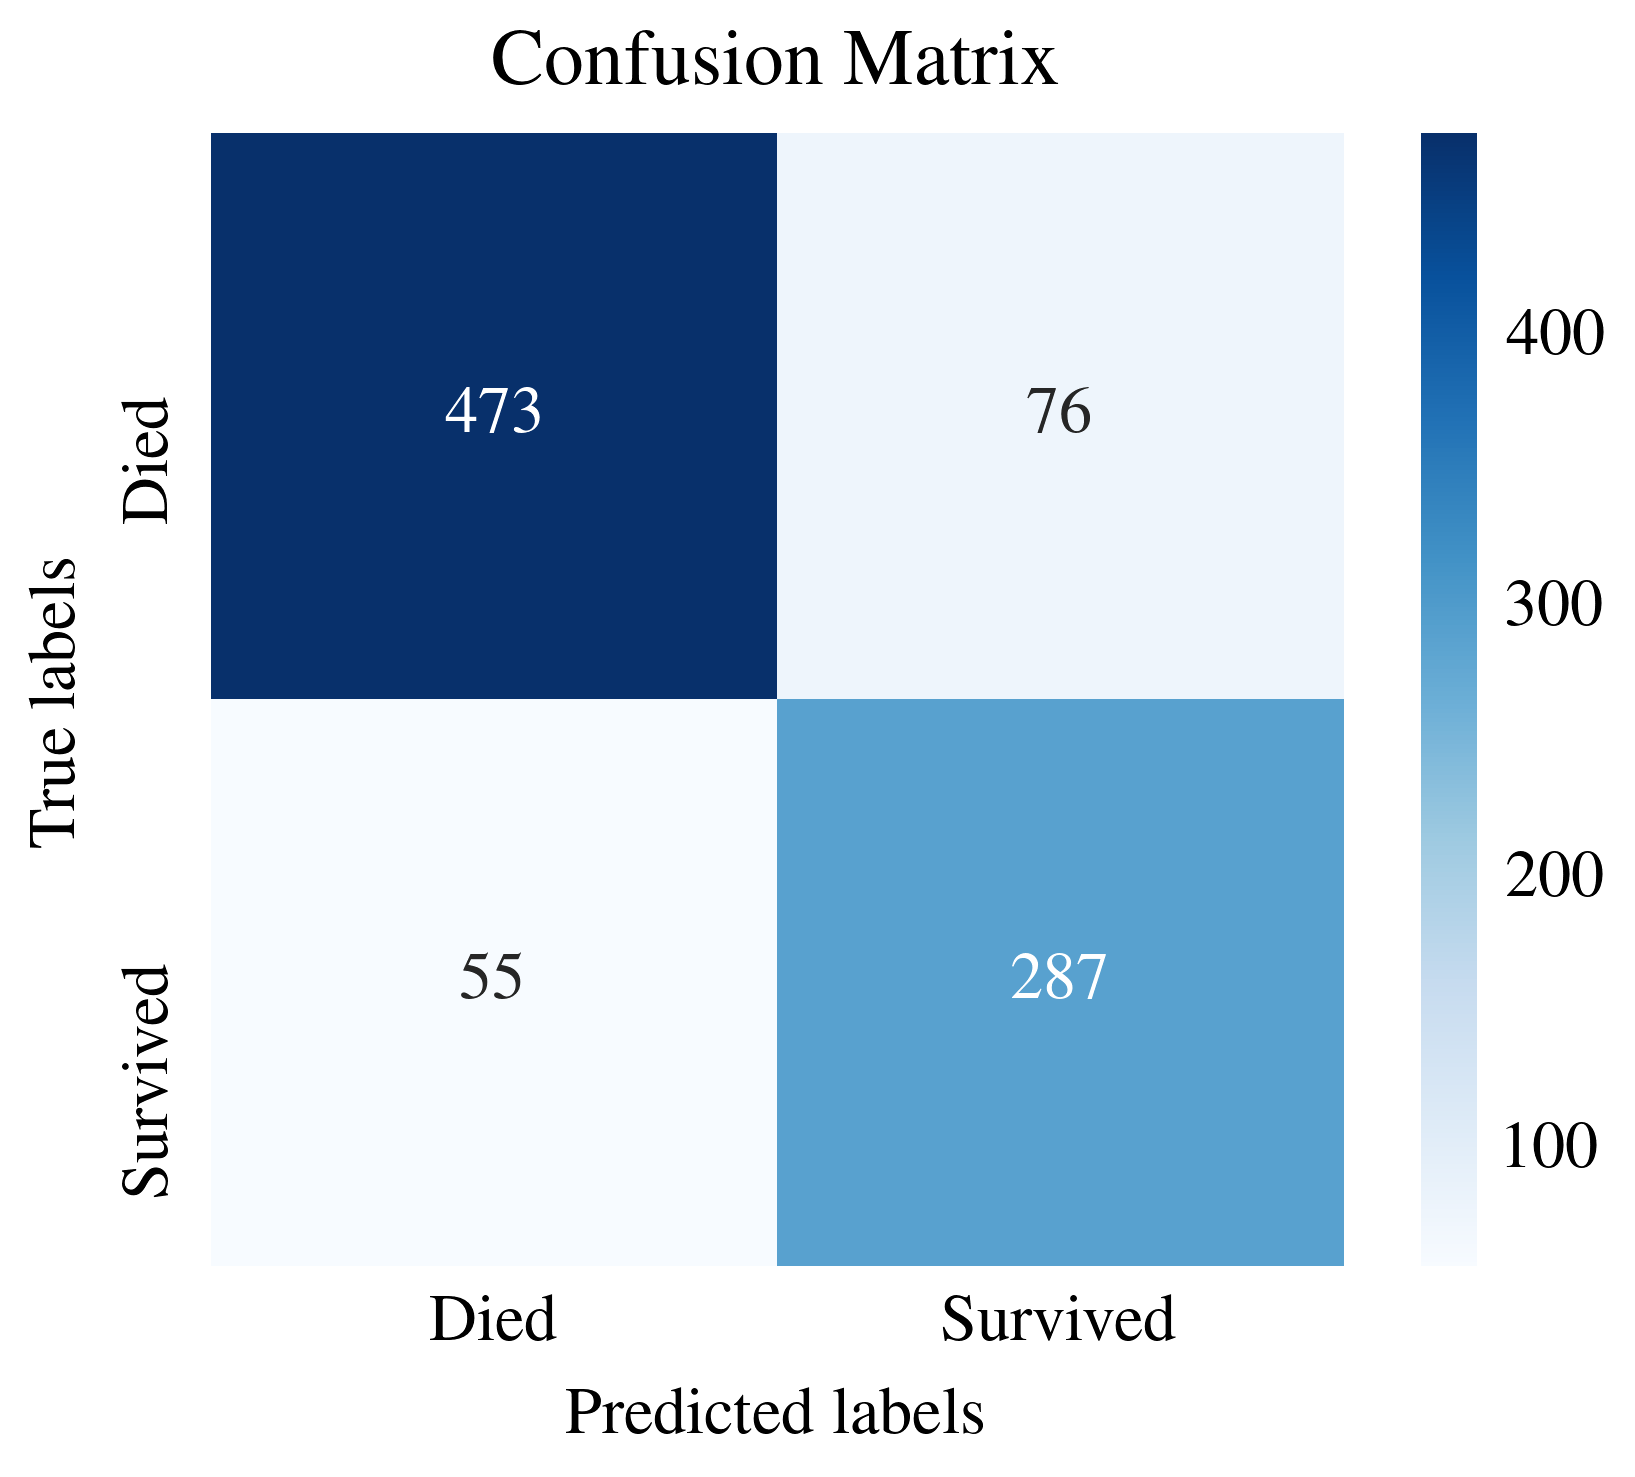

In [569]:
ax = plt.subplot()
sns.heatmap(cm,square = True,annot = True, cbar =True,cmap = 'Blues',fmt='g',
           xticklabels=['Died','Survived'],yticklabels=['Died','Survived'],ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.savefig('ConfusionMatrix')
plt.show()

In [570]:
def evaluation(y_act,y_pred):
    print("Accuracy :", accuracy_score(y_act,y_pred))
    print("Precision :", precision_score(y_act,y_pred))
    print("Recall :", recall_score(y_act,y_pred))
    print("F1 Score :", f1_score(y_act,y_pred))

In [571]:
evaluation(y_train,y_train_pred)

Accuracy : 0.8529741863075196
Precision : 0.790633608815427
Recall : 0.8391812865497076
F1 Score : 0.8141843971631205


In [572]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
y_scores = best_clf.predict_proba(X_train)
y_scores = y_scores[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

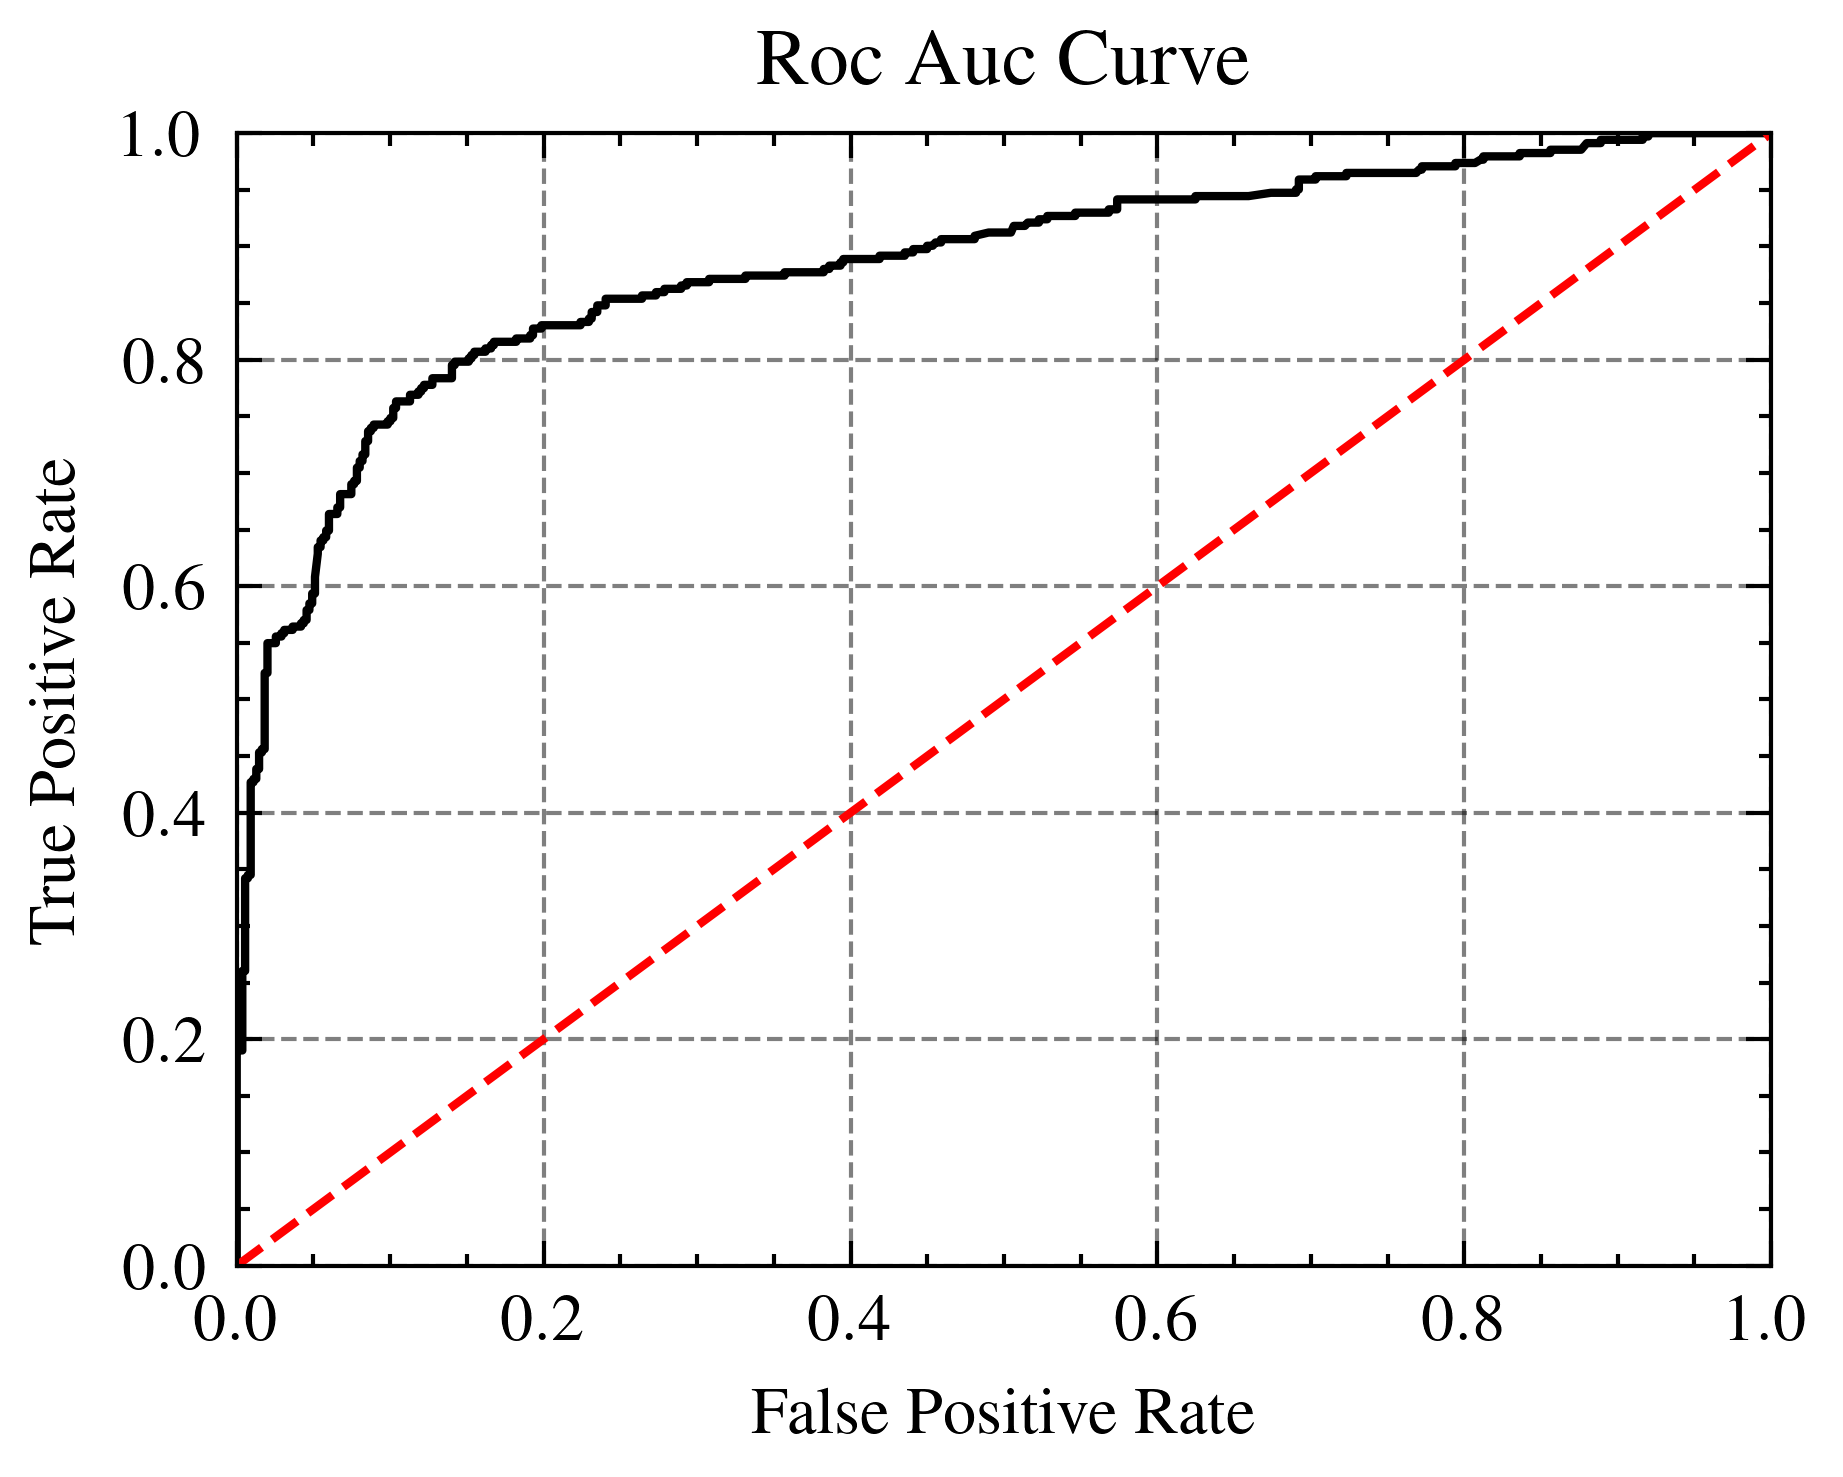

In [573]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Auc Curve')
plt.savefig('Rocauccurve')
plt.show()

In [574]:
# Auc roc score
roc_auc_score(y_train, y_scores)

0.8833098989124298

Area under roc curve is 0.8833